# Sahil Chawla

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Research question/interests

## My Interest in the Project

My group has chosen the topic of US Police shootings in from 2015-22. Through this project my group and I are trying to draw out conclusions, and gain a better understanding of how there are particular trends in the shootings that happen in america. I am aiming to learn how these shootings that take place, target people of particular gender, race, not mentally fine etc. The dataset also contains infromtaion on the coty and state where the shooting took place, so places that are more dangerous than others in this regard can be found out from an analysis of the dataset.  One of the aspects that I will be trying to find more about would be the trends in shooting of a person who not mentally stable. 

Some of my research questions are:
1) Trends in shooting for people belonging to marginalized communities, example women, people of colour, people with mental issues, people belonging to older age groups. 
2) Identify with the help of the trends, how the body cameras are playing a role in these shootings. Does the introduction of this technology make the environment safer ? Are these cameras actually even being used ? 


# Task 1 : Exploratory Data Analysis (EDA) 

## Main Variables Involved

### Lets take a look at the dataset, with some functions like .shape(), .info(), .head()

In [ ]:
df=pd.read_csv("../data/US Police shootings in from 2015-22 2.csv")
df.shape
df.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
5,6,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True
6,7,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,-111.841,33.328,True
7,8,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,-97.564,38.704,True
8,9,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,-91.119,40.809,True
9,10,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,-79.991,40.413,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7729 non-null   int64  
 1   name                     7312 non-null   object 
 2   date                     7729 non-null   object 
 3   manner_of_death          7729 non-null   object 
 4   armed                    7520 non-null   object 
 5   age                      7247 non-null   float64
 6   gender                   7709 non-null   object 
 7   race                     6269 non-null   object 
 8   city                     7729 non-null   object 
 9   state                    7729 non-null   object 
 10  signs_of_mental_illness  7729 non-null   bool   
 11  threat_level             7729 non-null   object 
 12  flee                     6854 non-null   object 
 13  body_camera              7729 non-null   bool   
 14  longitude               

In [ ]:
print(df.head())

   id                name        date   manner_of_death       armed   age  \
0   1          Tim Elliot  2015-01-02              shot         gun  53.0   
1   2    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   3  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   4     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   5   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fl

In [ ]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [ ]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,age,longitude,latitude
count,7729.000000,7247.000000,6892.000000,6892.000000
mean,3865.000000,37.178971,-97.059875,36.682999
std,2231.314448,12.966191,16.595557,5.402749
min,1.000000,2.000000,-160.007000,19.498000
25%,1933.000000,27.000000,-112.039000,33.480000
50%,3865.000000,35.000000,-94.226000,36.104500
75%,5797.000000,45.000000,-83.073250,40.032250
max,7729.000000,92.000000,-67.867000,71.301000


In [ ]:
shootings_data['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'undetermined', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'BB gun',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'railroad spikes',
       'stapler', 'beer bottle', 'crossbow', 'unknown weapon',
       'binoculars', 'pellet gun', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'pair of scissors', 'pole', 'pick-axe',
       'flashlight', 'spear', 'chair', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'glass shard', 'motorcycle',
       'pepper spray', 'metal rake', 'baton', 'crowbar',

## Lets look at some of the trends with the help of visualizations

### How many of the Cops had Body-Camera on during the time of the Incident.

Body-Camera's are extremely important in todays society, they have the ability to hold police accountable for wrongdoings and serve as a deterent to avoid abuse of power.

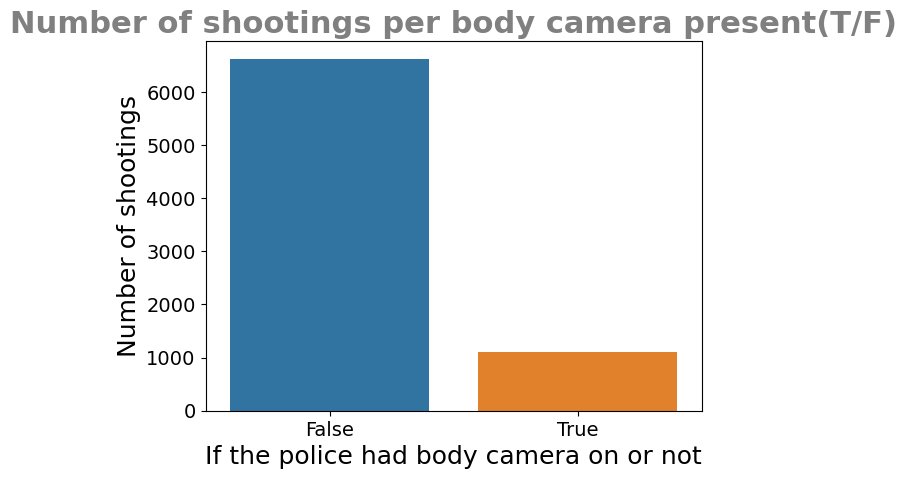

In [ ]:
sns.countplot(x ='body_camera', data = df)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('If the police had body camera on or not', fontsize=18)
plt.ylabel('Number of shootings', fontsize=18)
plt.title('Number of shootings per body camera present(T/F)', fontweight='bold', fontsize=22, color='grey')
plt.show()

The states have been pushing laws to make body cameras mandatory, and even after that approximately 6000 cases involved no body camera. 

### Counts of Shooting Based on Race

Lets see if plotting a graph of counts on y axis and race on x axis we can see if there is any corellation between the two

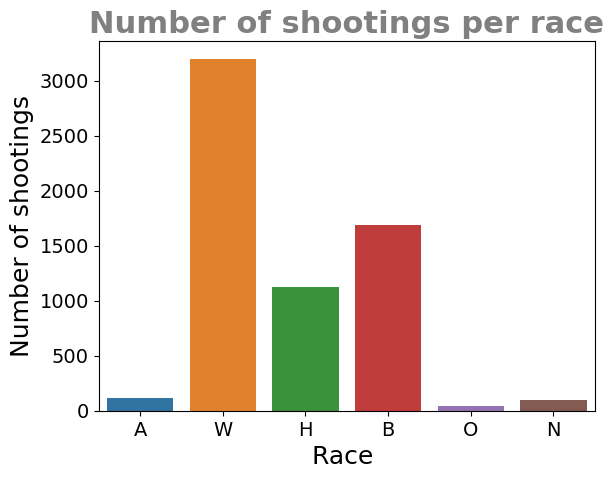

In [ ]:
sns.countplot(x ='race', data = df)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Race ', fontsize=18)
plt.ylabel('Number of shootings', fontsize=18)
plt.title('Number of shootings per race', fontweight='bold', fontsize=22, color='grey')
plt.show()

 The graph shows us that the count is highest for people who are white, and then the second highest is black. There is huge difference in the population though, as the majority of the people are white, and black is considered a minority. 

### Whether the Person had any Mental-illness or Not

By looking at this graph, we can see that almost 2000 people who were shot were suffering from some sort of mental illness. Now the question is if these could have been avoided, if someone who was a trained psychologist was with the police team at the time of the incidence. 

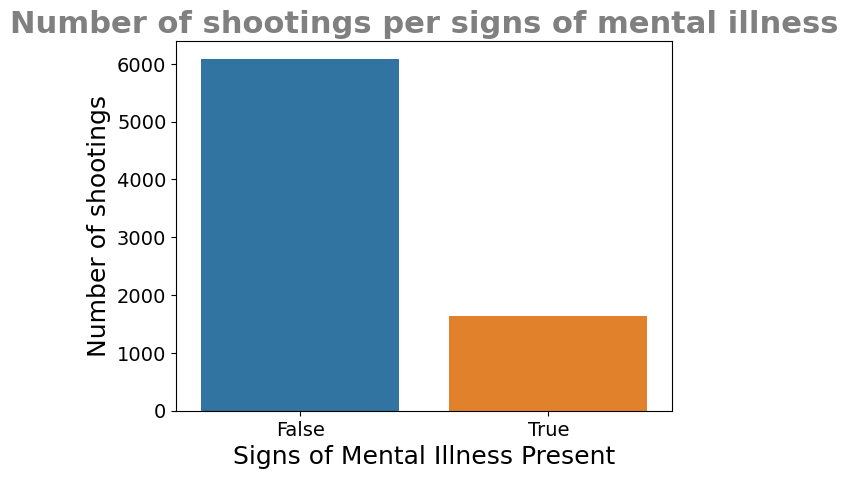

In [ ]:
sns.countplot(x ='signs_of_mental_illness', data = df)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Signs of Mental Illness Present', fontsize=18)
plt.ylabel('Number of shootings', fontsize=18)
plt.title('Number of shootings per signs of mental illness', fontweight='bold', fontsize=22, color='grey')
plt.show()

### Whether the person was fleeing or not

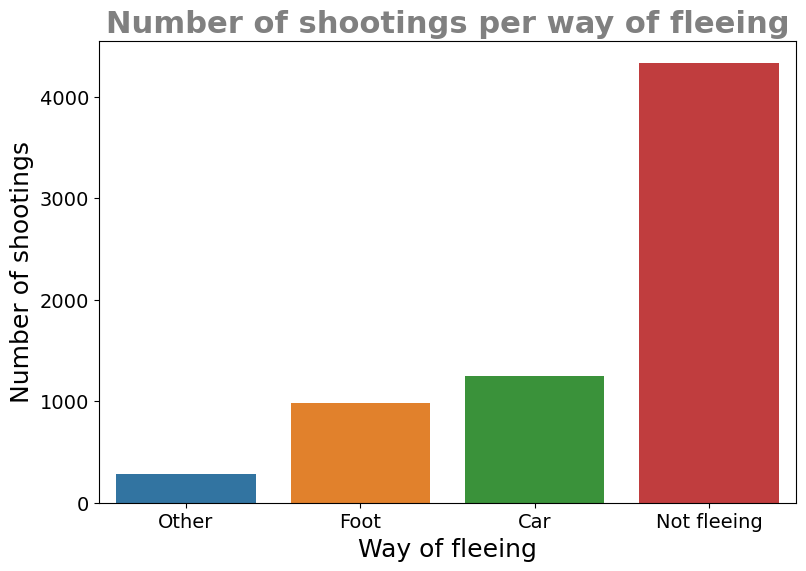

In [ ]:
flee_count = df.groupby('flee')[['id']].count().reset_index()
flee_count = flee_count.sort_values(by='id', ascending=True)

plt.figure(figsize = (9, 6))
sns.barplot(x='flee', y='id', data=flee_count)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Way of fleeing', fontsize=18)
plt.ylabel('Number of shootings', fontsize=18)
plt.title('Number of shootings per way of fleeing', fontweight='bold', fontsize=22, color='grey')
plt.show()

not_flee = df.flee[df['flee'] == 'Not fleeing'].count()
percentage_not_flee = not_flee / df.flee.count() * 100

After looking at the calculation done below, we can see clearly that approximately 62% of the people were not fleeing during the encounter with the police. So why did these people have to be shot ?

In [ ]:
not_flee = df.flee[df['flee'] == 'Not fleeing'].count()
percentage_not_flee = not_flee / df.flee.count() * 100
print(percentage_not_flee)

63.26232856726


## Cleaning the Dataset

#### Data with NULL Values

In [ ]:
if df.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    plt.show()


Preview of data with null values:
xxxxxxxxxxxxx
    id            name        date manner_of_death armed   age gender race  \
15  16   Loren Simpson  2015-01-08            shot   NaN  28.0      M    W   
26  27   Marcus Golden  2015-01-14            shot   NaN  24.0      M    B   
27  28  Michael Goebel  2015-01-14            shot   NaN  29.0      M    W   

               city state  signs_of_mental_illness  threat_level         flee  \
15          Huntley    MT                    False  undetermined  Not fleeing   
26         St. Paul    MN                    False        attack  Not fleeing   
27  Franklin County    MO                    False        attack  Not fleeing   

    body_camera  longitude  latitude  is_geocoding_exact  
15        False   -108.315    45.859                True  
26        False    -93.094    44.958                True  
27        False    -90.794    38.317                True  


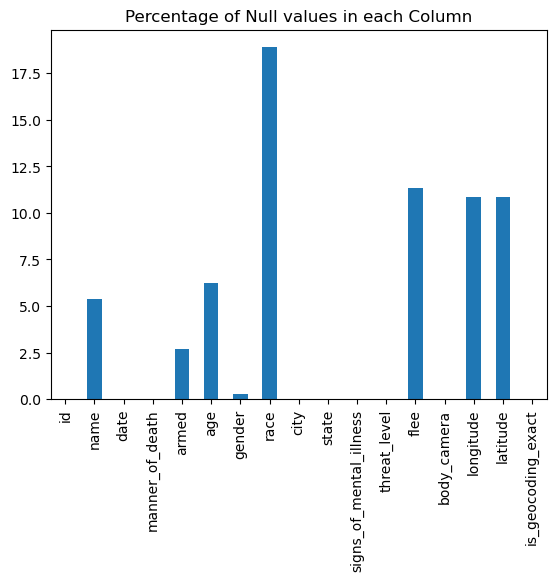

In [ ]:
null = df.isnull().sum()/df.shape[0]*100
null.plot(kind='bar')
plt.title("Percentage of Null values in each Column")
plt.show()

### Lets drop the null values from the dataset

In [ ]:
df.dropna(axis = 0, inplace = True)
print(f"After dropping null values, null values of the Dataset :")
df.isna().sum().to_frame()

After dropping null values, null values of the Dataset :


,0
id,0
name,0
date,0
manner_of_death,0
armed,0
age,0
gender,0
race,0
city,0
state,0


### The shape changes once the null values are dropped.

In [ ]:
print(f"After dropping null values, the shape of the Dataset is {df.shape}")

After dropping null values, the shape of the Dataset is (5070, 17)


#### Checking for Duplicate Values

In [ ]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


## Task 2 : Data Analysis Pipeline

#### Removing extra Columns

In [ ]:
clean_data=df.drop(['latitude','longitude','is_geocoding_exact'], axis=1)
clean_data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### Lets drop the name column aswell, and convert the age column

In [ ]:
shootings_data = clean_data.drop(['name'],axis=1)
shootings_data['age'] = shootings_data['age'].astype('str')
shootings_data.head()

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,1,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,3,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,4,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,5,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
shootings_data.age.value_counts()

27.0    181
31.0    181
25.0    177
34.0    175
32.0    171
       ... 
82.0      1
12.0      1
78.0      1
77.0      1
88.0      1
Name: age, Length: 76, dtype: int64

In [ ]:
shootings_data['race'].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

### We can make the dataset easier to read but making a few changes like, specifying what the race actually is instead of using a single letter.

In [ ]:
shootings_data["race"].replace({"W":"White", "B":"Black", "H":"Hispanic", "A":"Asian", "N":"Native", "O":"Other"}, inplace = True)
shootings_data["date"] = pd.to_datetime(shootings_data["date"])
shootings_data["Year"] = shootings_data["date"].dt.year
shootings_data.head(5)

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Year
0,1,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,2015
1,2,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,2015
2,3,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,2015
3,4,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,2015
4,5,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,2015


In [ ]:
shootings_data.rename(columns={"name": "Name","date": "Date","manner_of_death": "Manner Of Death","armed":"Armed","age":"Age","gender":"Gender","race":"Race","city":"City","state":"State","signs_of_mental_illness":"Mental Illness"})

,id,Date,Manner Of Death,Armed,Age,Gender,Race,City,State,Mental Illness,threat_level,flee,body_camera,Year
0,1,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,2015
1,2,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,2015
2,3,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,2015
3,4,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,2015
4,5,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7473,7474,2022-06-10,shot,gun,38.0,M,White,Elizabethton,TN,False,other,Not fleeing,False,2022
7492,7493,2022-06-18,shot,gun,24.0,M,Black,Milwaukie,OR,False,other,Car,False,2022
7500,7501,2022-06-19,shot,toy weapon,58.0,M,Black,Albuquerque,NM,True,other,Not fleeing,False,2022
7691,7692,2022-08-27,shot,gun,50.0,M,White,Charleston,WV,False,attack,Not fleeing,False,2022


In [ ]:
shootings_data.to_csv('clean_data.csv', encoding='utf-8', index=False)

## Task 4: Data Analysis

##### I will be going through the dataset, and finding trends in the police shootings for people belonging to marganilized communities of society.

##### I want to understand that if their inter-sectionality puts them at a higher risk than others. 

### Signs of Mental Illness

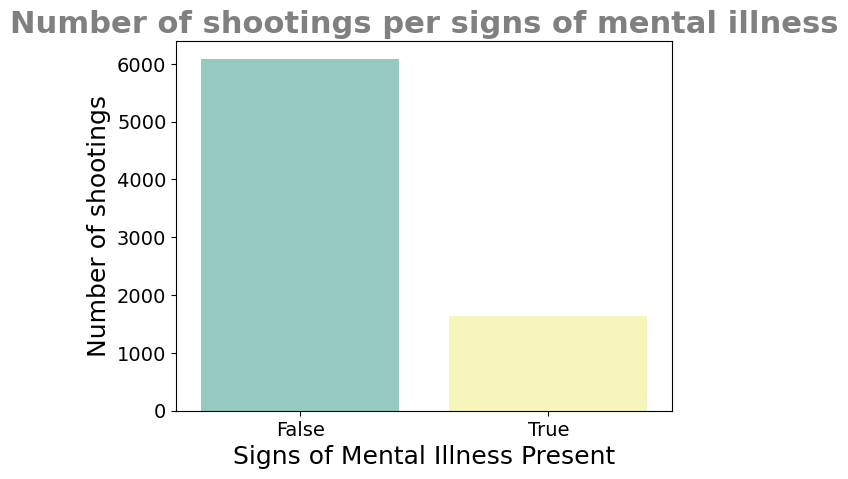

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(data = shootings_data, x='signs_of_mental_illness',palette = "Set3").set_title("Were they showing signs of mental illness?")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Signs of Mental Illness Present', fontsize=18)
plt.ylabel('Number of shootings', fontsize=18)
plt.title('Number of shootings per signs of mental illness', fontweight='bold', fontsize=22, color='grey')
plt.show()
plt.savefig('count-mental-ill.png')

From the above visualization we can see that, in around 1500 cases in which a cop used his gun, a person who was not mentally sane was involved. What I want further explore is how these incidences could have been avoided if a trained psychologist would have been with the police team at the time of the altercation. 

### Lets look at the graphs below which compare race and gender to the total counts, and take mental illness in account aswell.
#### Somebody who already belongs to a marginalized community is already at an extra danger to some extent, but being mentally unfit puts them at an even worse position. 

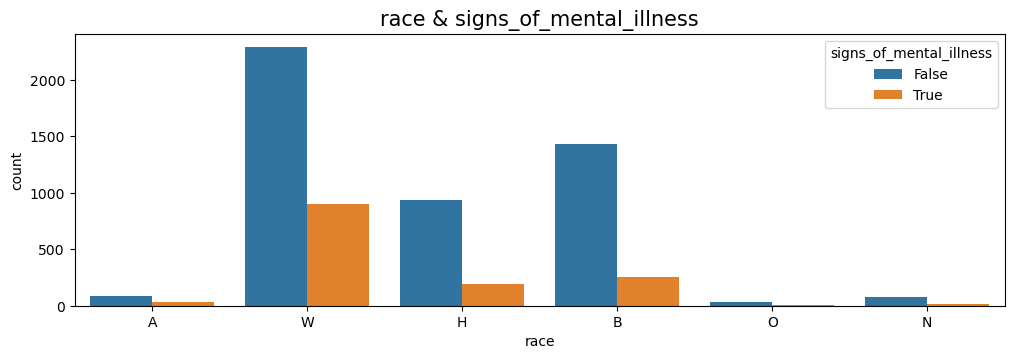

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.subplots(figsize=(12,12))
plt.subplot(3,1,1)
sns.countplot(x='race', hue='signs_of_mental_illness', data=df)
plt.title('race & signs_of_mental_illness', fontsize=15)
plt.show()
plt.savefig('race-gender-mental-ill.png')




In the graph above, we can see that after the white population( which is the highest in most states), the Hispanic and Black community face the most danger even when though they vary greatly in number from the white population. 

##### Now for the pther graph, we are going to be comparing gender with the total count. 

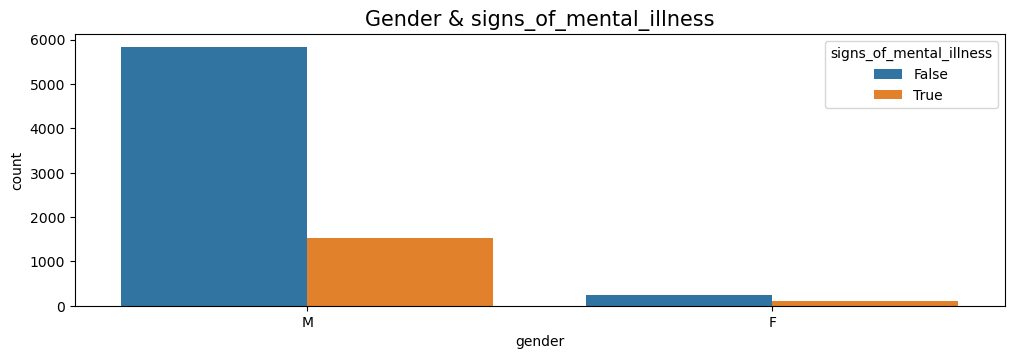

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.subplots(figsize=(12,12))
plt.subplot(3,1,1)
sns.countplot(x='gender', hue='signs_of_mental_illness', data=df)
plt.title('Gender & signs_of_mental_illness', fontsize=15)
plt.show()
plt.savefig('gender-mental-ill.png')

As we can see in the graph above, there is a huge difference between Males and Females in the amount of shooting counts, but again there i a difference in the total population.

### Lets look race vs age, to gain a better understanding of the marginalized communities

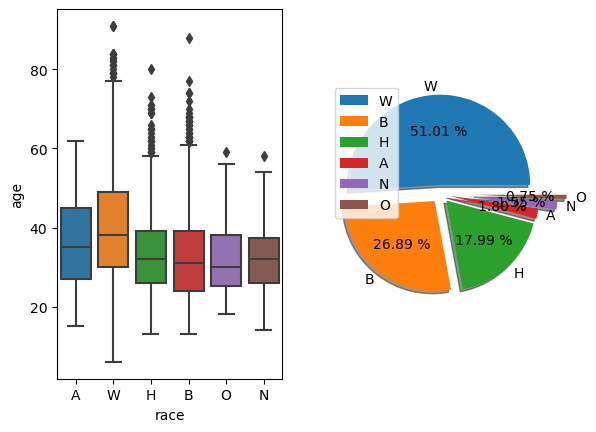

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.subplot(122)
plt.pie(df["race"].value_counts(), labels=df["race"].value_counts().index, shadow=True, autopct="%.2f %%", explode=[0.1,0.1,0.1,0.1,0.3,0.4])
plt.legend()

plt.subplot(121)
sns.boxplot(x="race",y="age", data=df)
plt.show()
plt.savefig('racevsage.png')

From the above visualizations we can see that how white victims seems to be the oldest when shot, wheras blacks, hispanic and other communities get into these shootings at a much younger age. 

### Lets see if any marginalized communities according to age i.e children an elderly are affected by these shooting 

C:\Users\SAHIL\AppData\Local\Temp\ipykernel_48368\3938495465.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],kde=True,color='r')


<AxesSubplot:xlabel='age', ylabel='Density'>

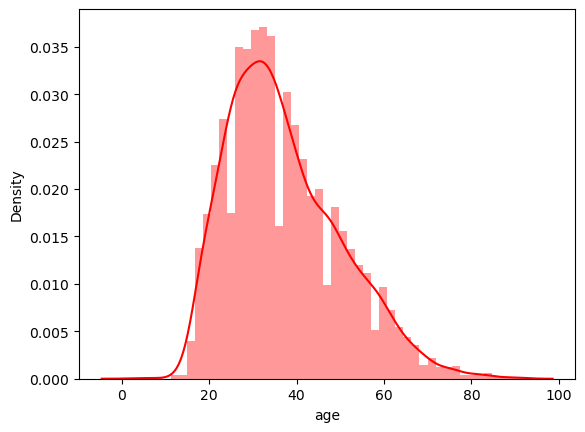

In [ ]:
sns.distplot(df['age'],kde=True,color='r')

From the above visualization we can draw out the conclusion that the elderly and children barely have counts of shooting though they also compromise a smaller section in the population

### Lets look at the pie charts below, showing ratio of body camera on or not when taking race as a factor

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

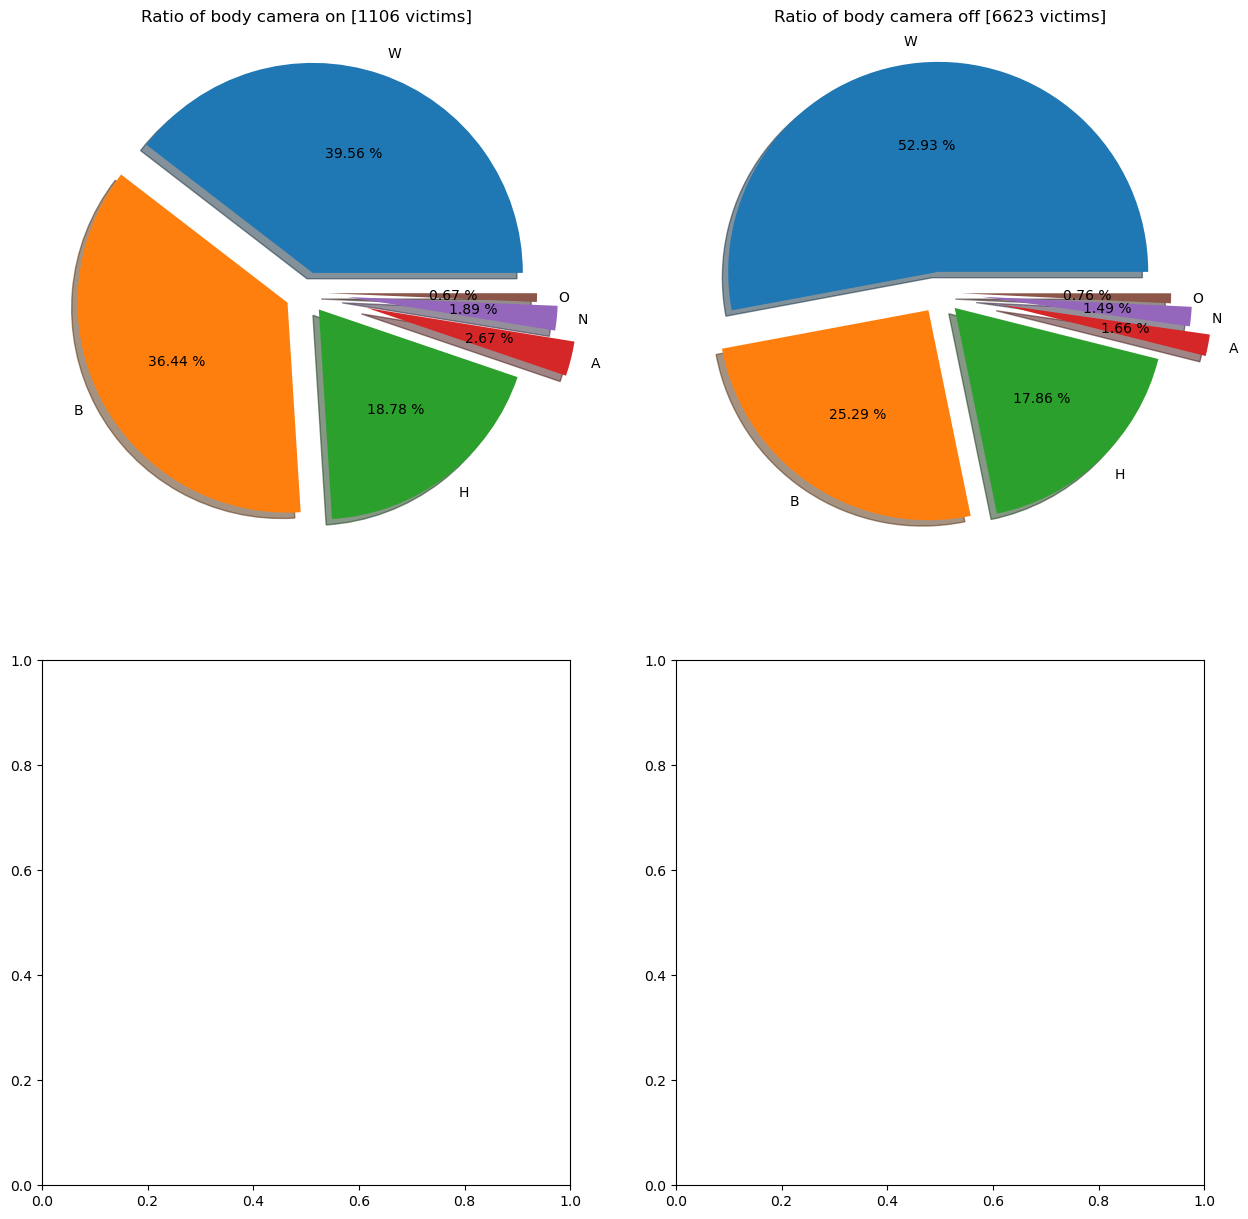

In [ ]:
body_cam_off = df[df["body_camera"] == False]
body_cam_on = df[df["body_camera"] == True]

_, axes = plt.subplots(2, 2, figsize=(15,15))

axes[0, 0].pie(body_cam_on["race"].value_counts(), labels=body_cam_on["race"].value_counts().index, autopct="%.2f %%", shadow=True, explode=[0.1, 0.1, 0.1, 0.3, 0.2, 0.1])
axes[0, 0].set_title(f"Ratio of body camera on [{len(body_cam_on)} victims]")

axes[0, 1].pie(body_cam_off["race"].value_counts(), labels=body_cam_off["race"].value_counts().index, autopct="%.2f %%", shadow=True, explode=[0.1, 0.1, 0.1, 0.3, 0.2, 0.1])
axes[0, 1].set_title(f"Ratio of body camera off [{len(body_cam_off)} victims]")



sns.barplot(body_cam_off["race"].value_counts(), body_cam_off["race"].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title(f"Ratio of body camera off [{len(body_cam_off)} victims]")

plt.show()



The above visualization shows that there are approximately seven times more counts of shootings when body-cameras are not on

### Lets look at all the states, and the counts of shooting in these states when body camera was on or not. We are looking at the states individually because body-camera laws vary from state to state

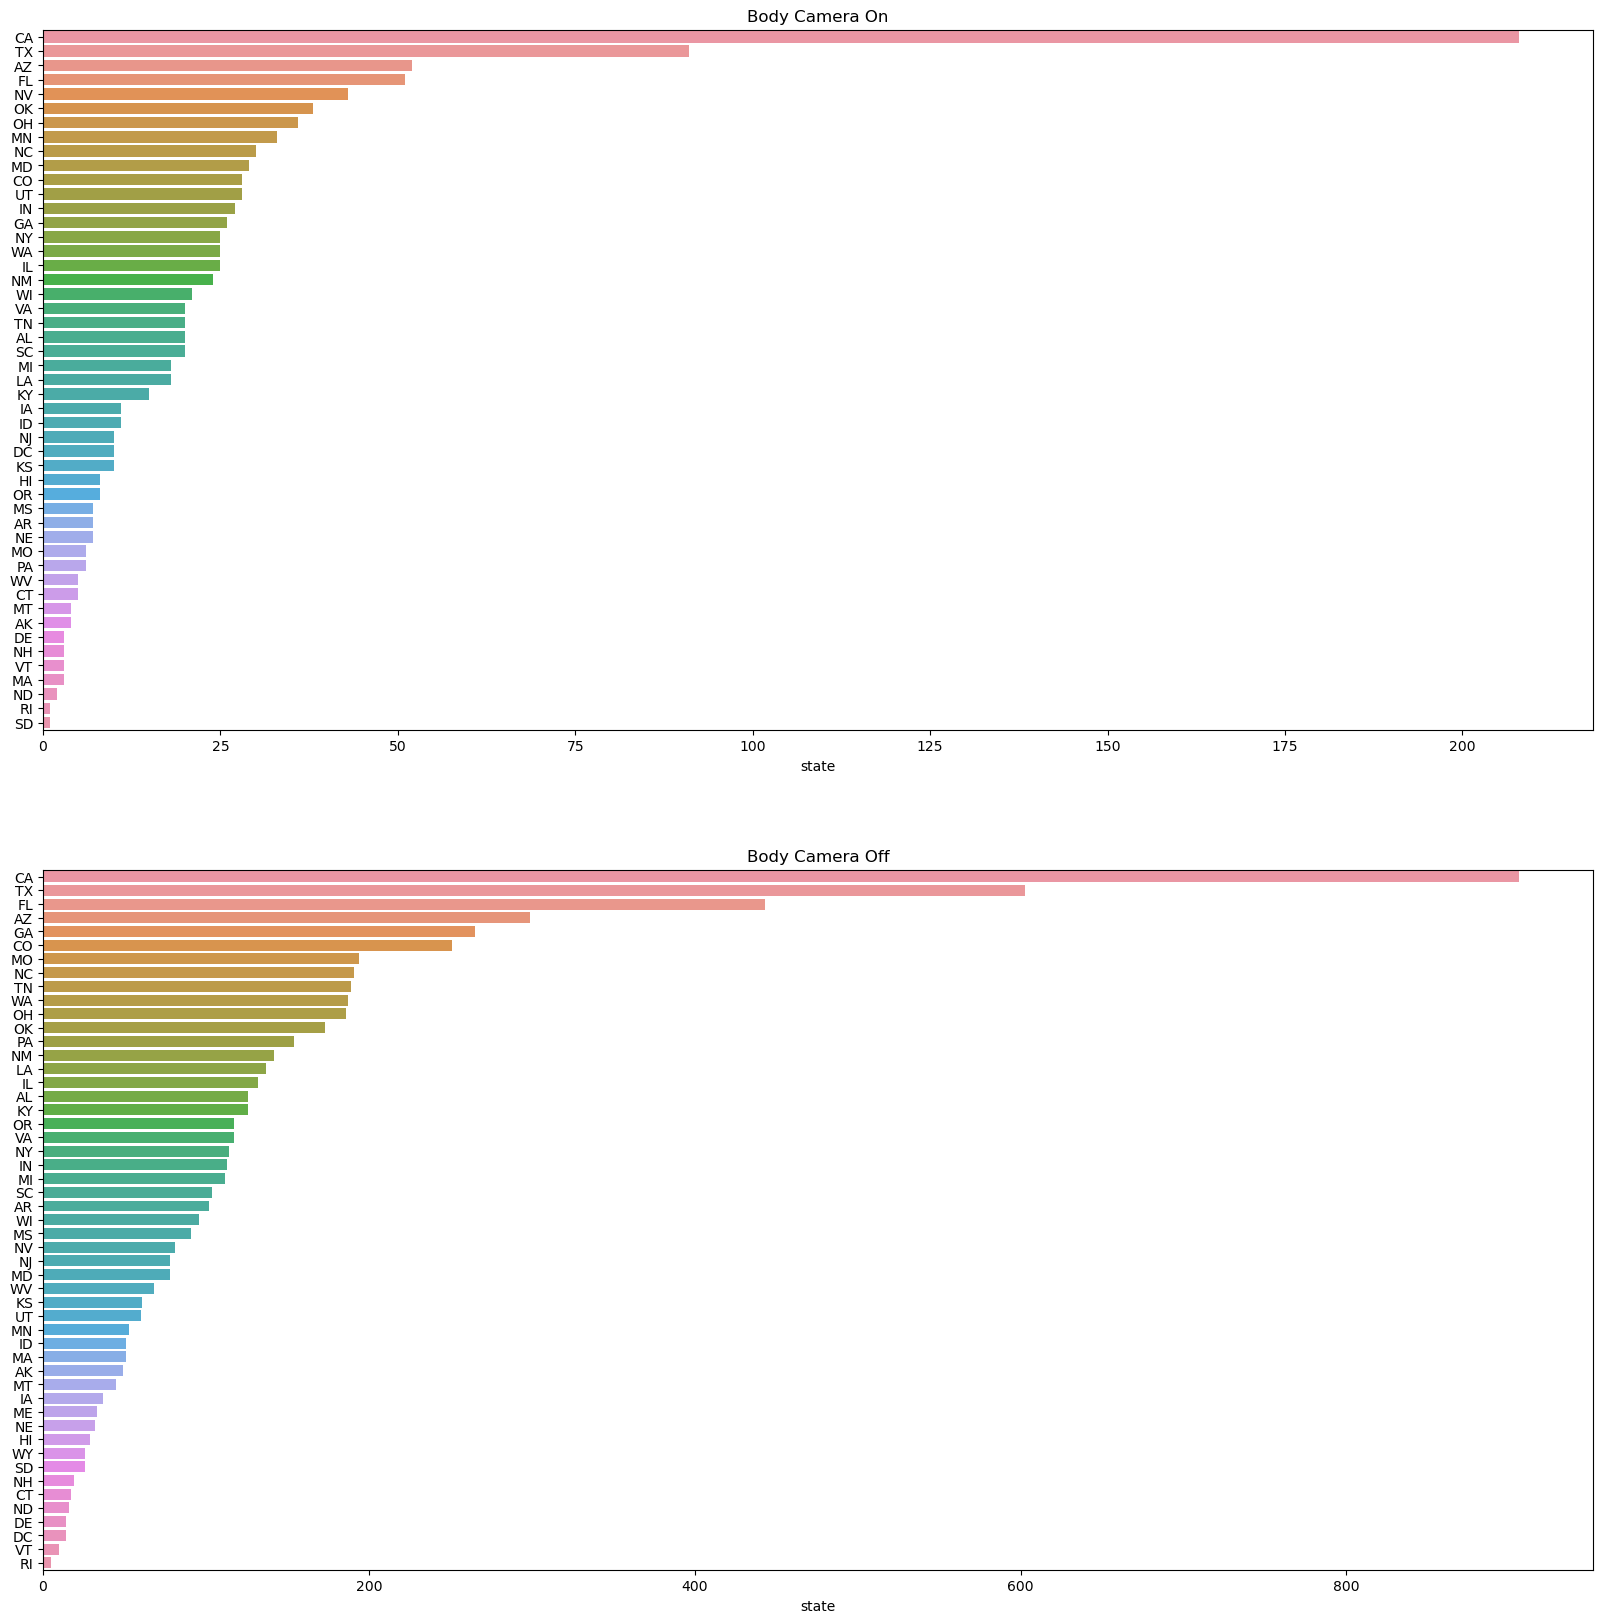

In [ ]:
_, axes = plt.subplots(2,1, figsize=(20, 20))
sns.barplot(x=body_cam_on["state"].value_counts(), y=body_cam_on["state"].value_counts().index, ax=axes[0])
sns.barplot(x=body_cam_off["state"].value_counts(), y=body_cam_off["state"].value_counts().index, ax=axes[1])

axes[0].set_title("Body Camera On")
axes[1].set_title("Body Camera Off")
plt.show()

## Conclusion

After doing an in depth analysis of the dataset, and looking for different trends to gain an insight towards my research question, I have drawn some conclusions. 
**Research Answer 1**
When looking at marginalized communities I looked at people of colour, people who are too young or old, and people who are not mentally well. 
There were approximately 2000 cases in which someone who was not mentally well was involved. When looking at the graph of mentall-ill plus race vs count, the people belonging to hispanic and black communities has the highest counts after white people, even though their population sizes were quite different. After that coming to the graph which compares the gender, bases on counts of shooting, females were involved in a lot less cases than men. 
Lastly when we look at marginalized communities, we looked at the age vs counts of shooting graph from which we can draw out the conclusion that children an elderely were involved in barely any counts of shooting , whereas people belonging to the range of 20 to late 40 had the most counts. 

**Research Answer 2**
For my second research question I looked at how the trends in shooting are affected when a body camera is involved or not. For this question I looked at a pie chart which showed a distribution by race when body camera was present and when it was not present. After looking the graph I drew the conclusion that when body camera was not present the percentage of cases increased for people belonging to white and hispanic community, but the ratio between on and off was around 1:6 so an accurate picture cannot be drawn. After this I looked at a graph of body camera on and off vs the states in usa. 
